In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [140]:
data = pd.read_csv(r'Registros clínicos de insuficiencia cardíaca\heart_failure_clinical_records_dataset.csv')
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
data.shape

(299, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [5]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [6]:
def histograma(df, x, n1, n2):
    return (sns.histplot(df[x], ax=axs[n1,n2]),
    axs[n1,n2].set_title(f'Distribución de {x}'))
    

In [7]:
def graf_barras(df, x, n1, n2):
    # Agrupamos y contamos pacientes
    df_g = df.groupby(x).size().reset_index(name="numero_pacientes")

    # Graficamos
    sns.barplot(data=df_g, x=x, y="numero_pacientes", hue =x, ax=axs[n1, n2])
    axs[n1, n2].set_title(f'Distribución de {x}')

In [8]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

(<Axes: title={'center': 'Distribución de time'}, xlabel='time', ylabel='Count'>,
 Text(0.5, 1.0, 'Distribución de time'))

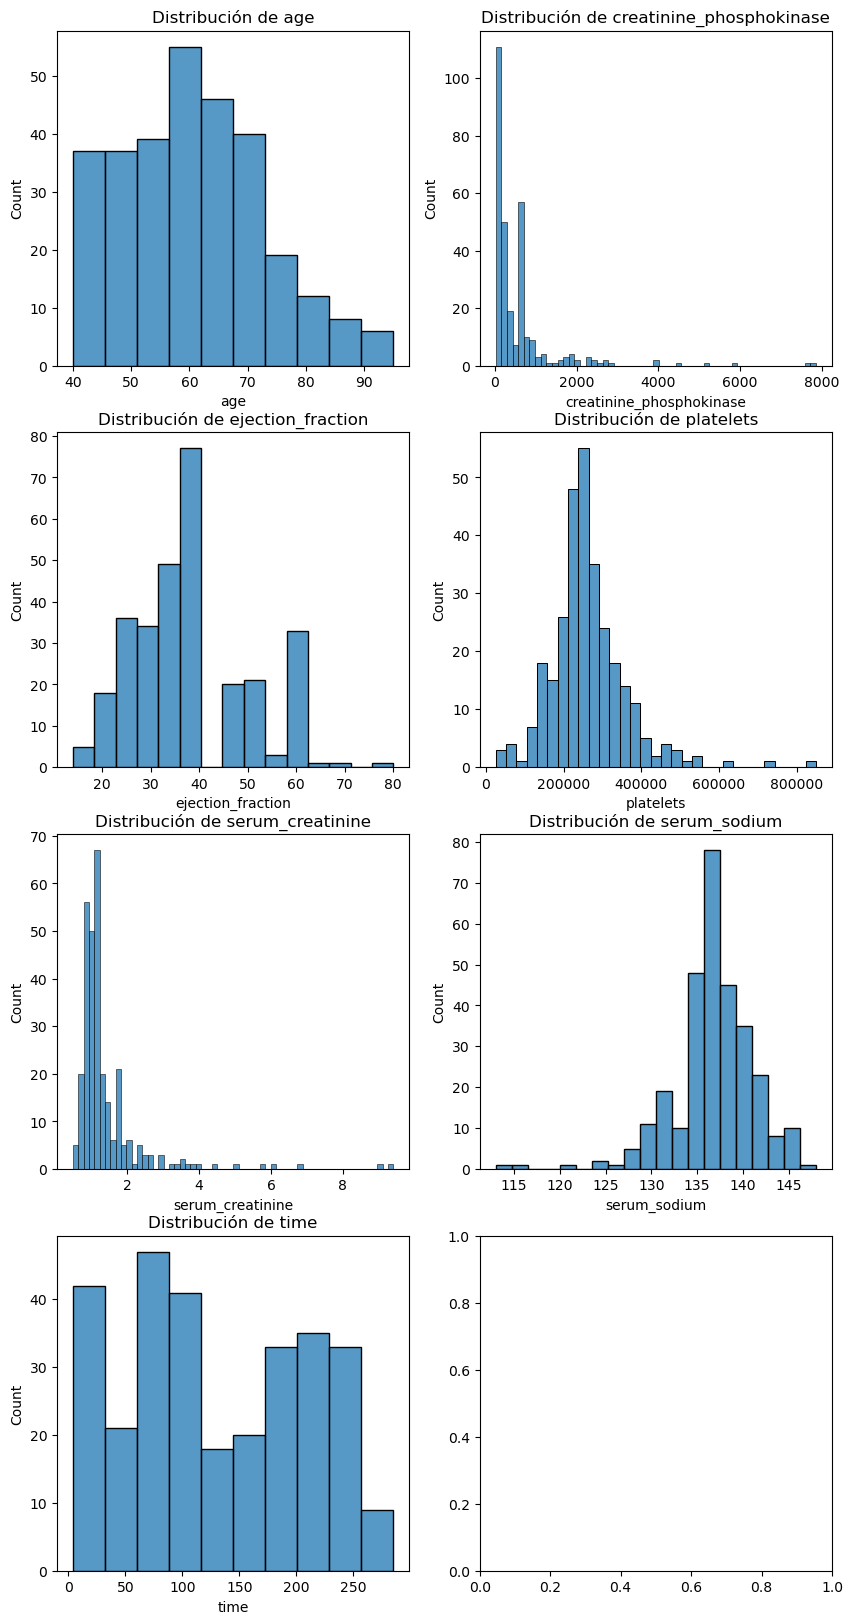

In [9]:
figure, axs = plt.subplots( 4,2, sharey=False, sharex=False, figsize=(10, 20))
histograma(data, 'age', 0,0)
histograma(data, 'creatinine_phosphokinase', 0,1)
histograma(data, 'ejection_fraction', 1,0)
histograma(data, 'platelets', 1,1)
histograma(data, 'serum_creatinine', 2,0)
histograma(data, 'serum_sodium', 2,1)
histograma(data, 'time', 3,0)

In [10]:
data.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

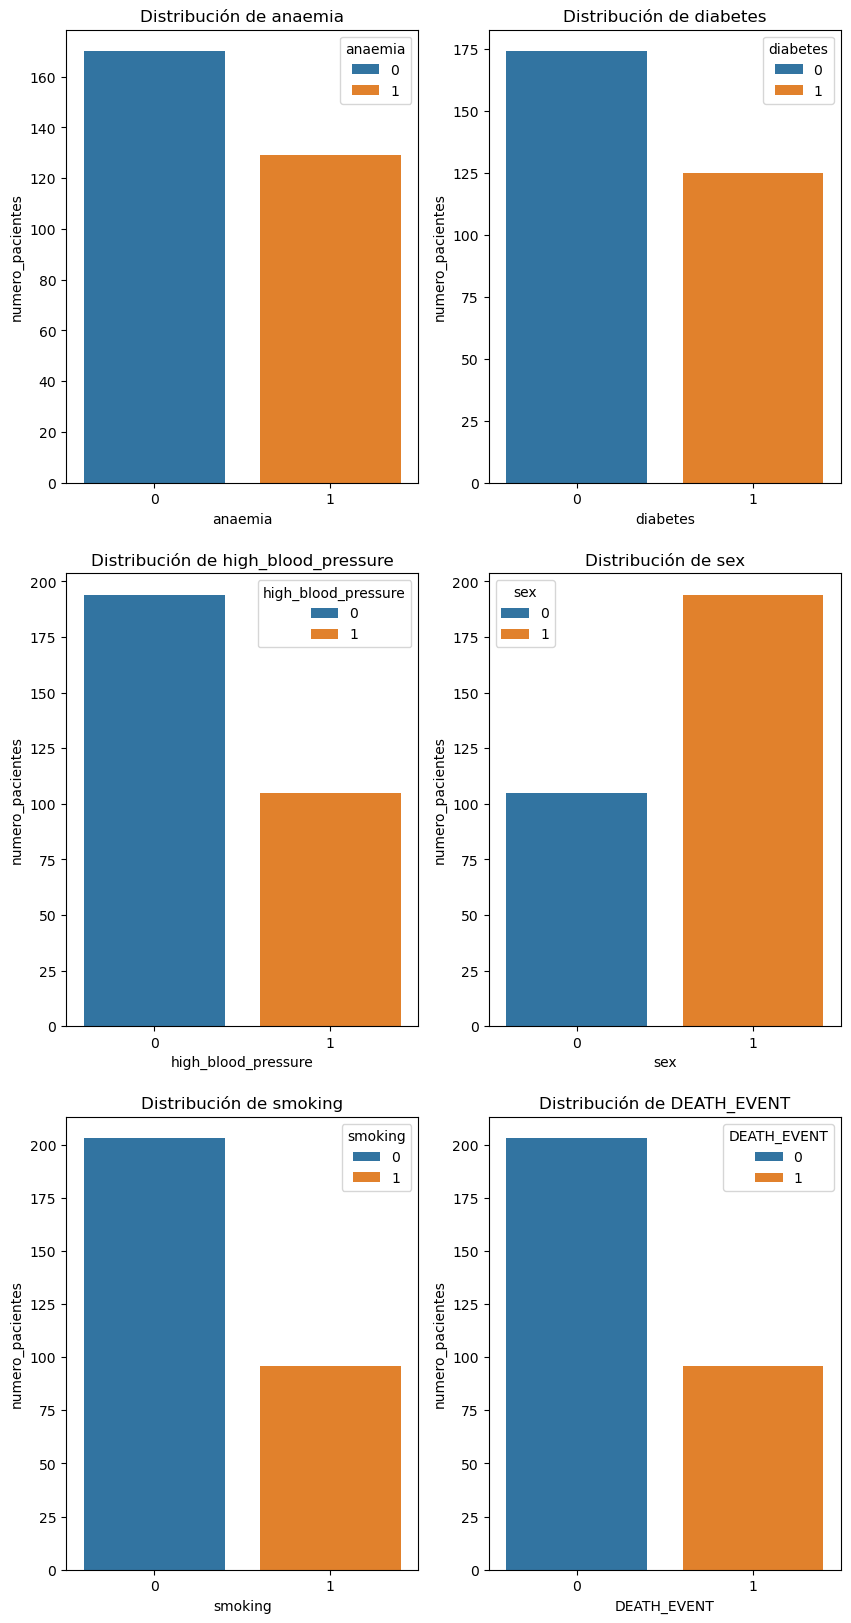

In [11]:
figure, axs = plt.subplots( 3,2, sharey=False, sharex=False, figsize=(10, 20))
graf_barras(data, 'anaemia', 0,0)
graf_barras(data, 'diabetes', 0,1)
graf_barras(data, 'high_blood_pressure', 1,0)
graf_barras(data, 'sex', 1,1)
graf_barras(data, 'smoking', 2,0)
graf_barras(data, 'DEATH_EVENT', 2,1)

In [12]:
def graf_barras_x_dead(df, x, n1, n2, labels_dict=None):
    # Agrupamos y contamos pacientes (sin modificar df original)
    df_g = df.groupby([x, "DEATH_EVENT"]).size().reset_index(name="numero_pacientes")

    # Reemplazo de etiquetas SOLO en df_g
    df_g["DEATH_EVENT"] = df_g["DEATH_EVENT"].map({0: "Vivo", 1: "Muerto"})
    if labels_dict:
        df_g[x] = df_g[x].map(labels_dict)

    # Graficamos
    sns.barplot(data=df_g, x=x, y="numero_pacientes", hue="DEATH_EVENT", ax=axs[n1, n2])
    axs[n1, n2].set_title(f'Distribución de {x}')

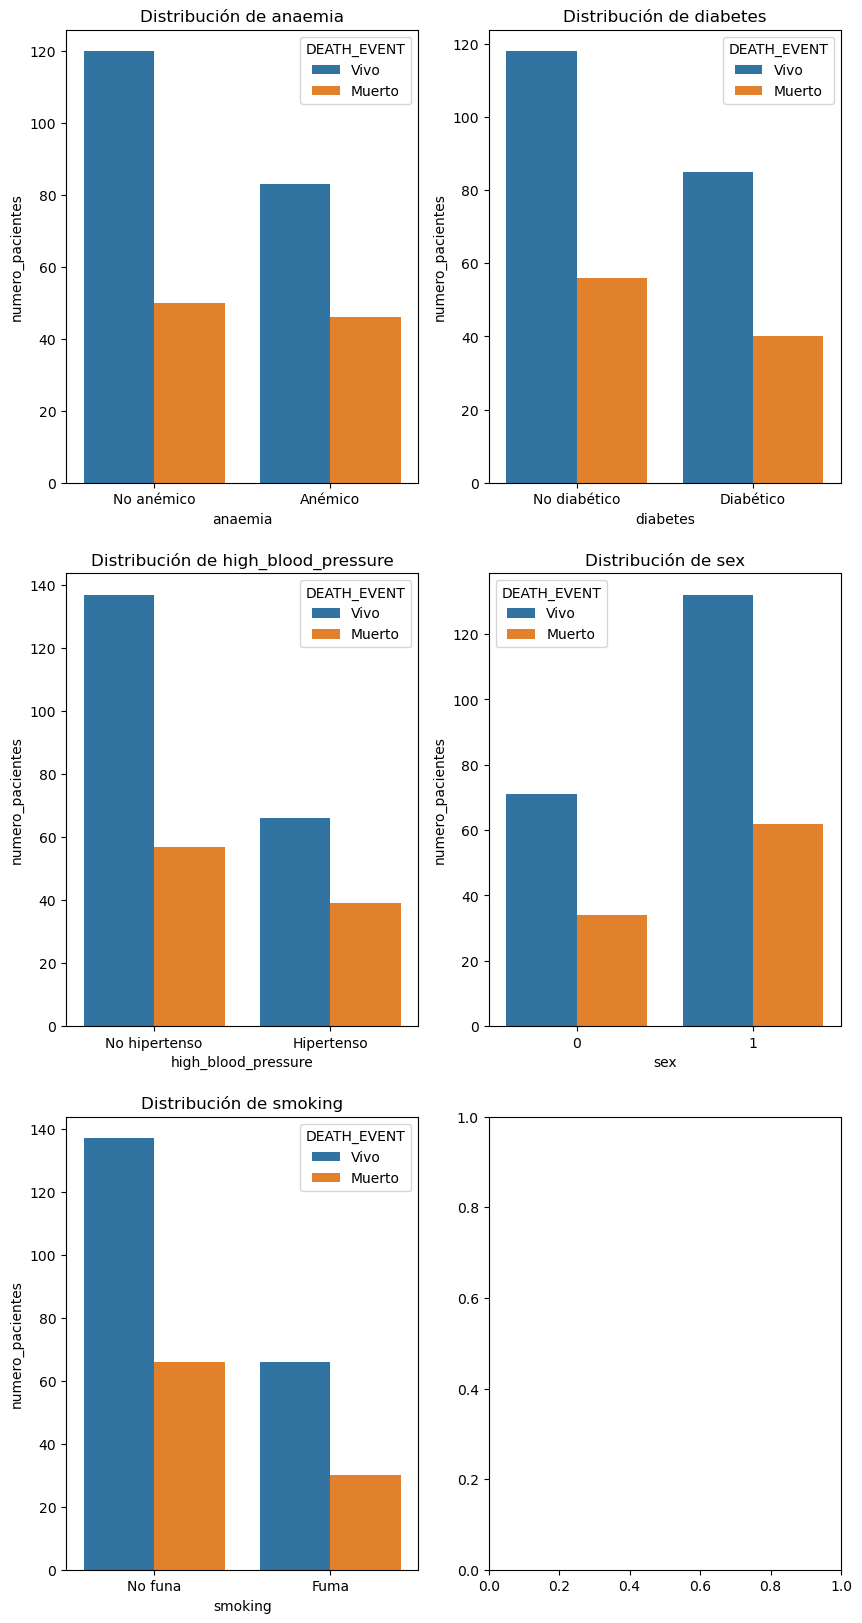

In [13]:
figure, axs = plt.subplots( 3,2, sharey=False, sharex=False, figsize=(10, 20))
graf_barras_x_dead(data, 'anaemia', 0,0, labels_dict={0:"No anémico", 1:"Anémico"})
graf_barras_x_dead(data, 'diabetes', 0,1, labels_dict={0:"No diabético", 1:"Diabético"})
graf_barras_x_dead(data, 'high_blood_pressure', 1,0, labels_dict={0:"No hipertenso", 1:"Hipertenso"})
graf_barras_x_dead(data, 'sex', 1,1)
graf_barras_x_dead(data, 'smoking', 2,0, labels_dict={0:"No funa", 1:"Fuma"})

In [14]:
def graf_barras_x_dead_rel(df, x, n1, n2, labels_dict=None):
    # Agrupamos y contamos (sin modificar df original)
    df_g = df.groupby([x, "DEATH_EVENT"]).size().reset_index(name="count")

    # Reemplazo de etiquetas SOLO en df_g
    df_g["DEATH_EVENT"] = df_g["DEATH_EVENT"].map({0: "Vivo", 1: "Muerto"})
    if labels_dict:
        df_g[x] = df_g[x].map(labels_dict)

    # Normalizamos por cada categoría de x
    df_g["rel"] = df_g.groupby(x)["count"].transform(lambda y: y / y.sum())

    # Graficamos (relativo)
    sns.barplot(data=df_g, x=x, y="rel", hue="DEATH_EVENT", ax=axs[n1, n2])

    # Formato
    axs[n1, n2].set_ylabel("Proporción")
    axs[n1, n2].set_title(f'Distribución relativa de {x}')
    axs[n1, n2].yaxis.set_major_formatter(lambda y, _: f"{y:.0%}")
    axs[n1,n2].legend(bbox_to_anchor=(1, 0.2), loc='upper left'),
    axs[n1,n2].set_title(f'frecuencia relativa de supervivencia: {x}')

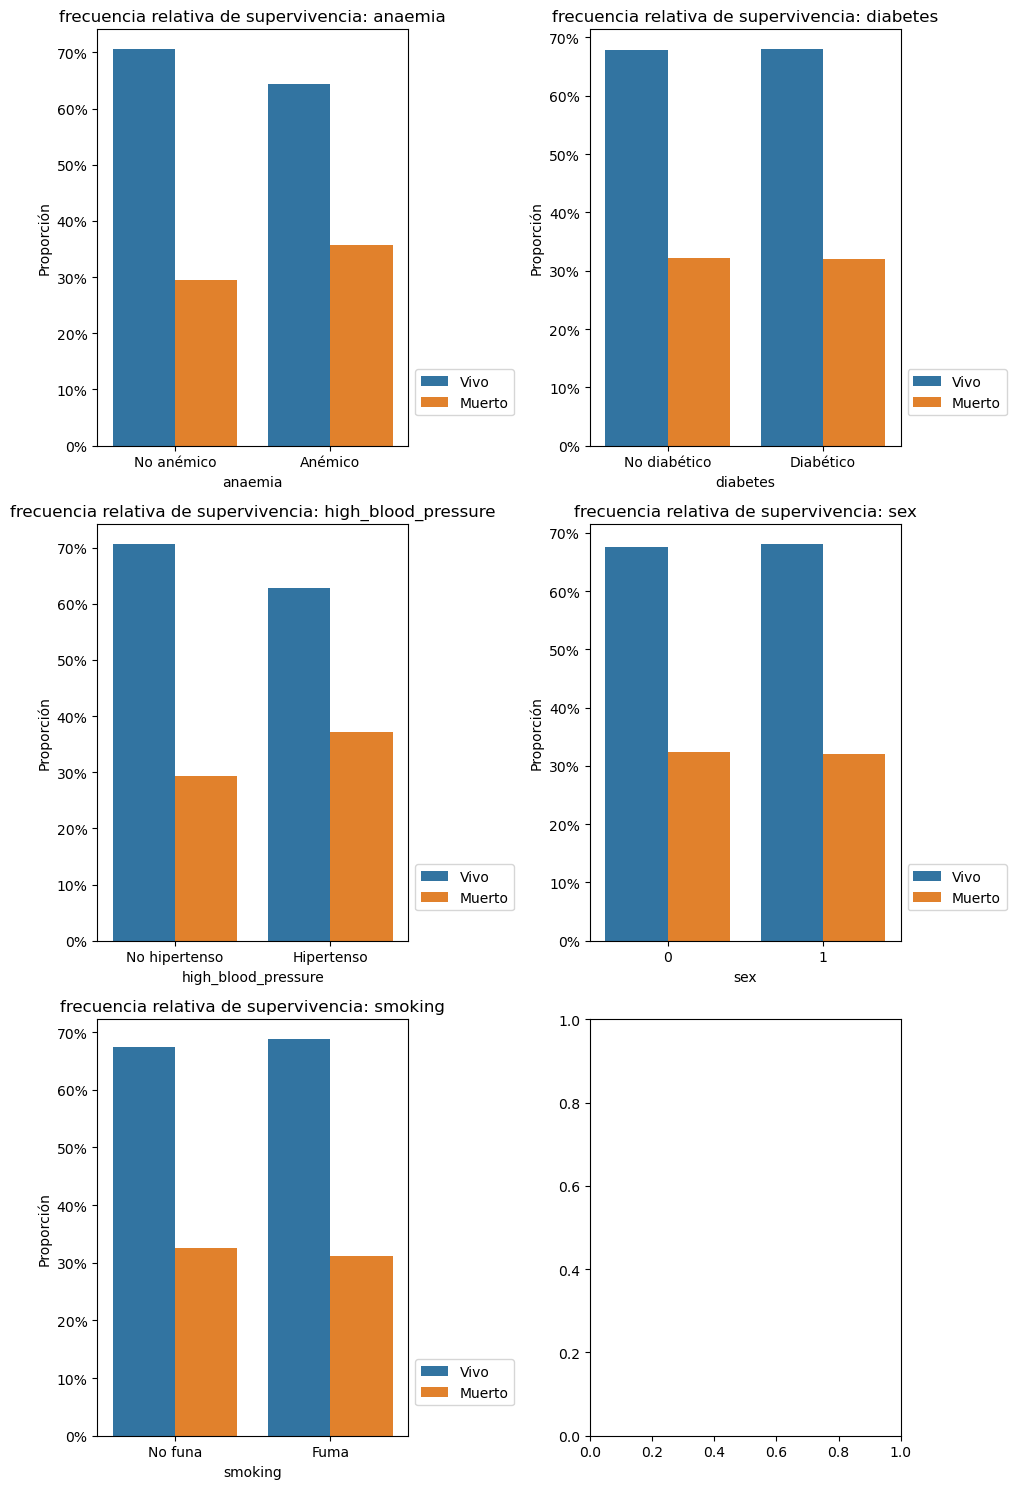

In [15]:
figure, axs = plt.subplots( 3,2, sharey=False, sharex=False, figsize=(10, 15))
graf_barras_x_dead_rel(data, 'anaemia', 0,0, labels_dict={0:"No anémico", 1:"Anémico"})
graf_barras_x_dead_rel(data, 'diabetes', 0,1, labels_dict={0:"No diabético", 1:"Diabético"})
graf_barras_x_dead_rel(data, 'high_blood_pressure', 1,0, labels_dict={0:"No hipertenso", 1:"Hipertenso"})
graf_barras_x_dead_rel(data, 'sex', 1,1)
graf_barras_x_dead_rel(data, 'smoking', 2,0, labels_dict={0:"No funa", 1:"Fuma"})
plt.tight_layout()
plt.show()

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


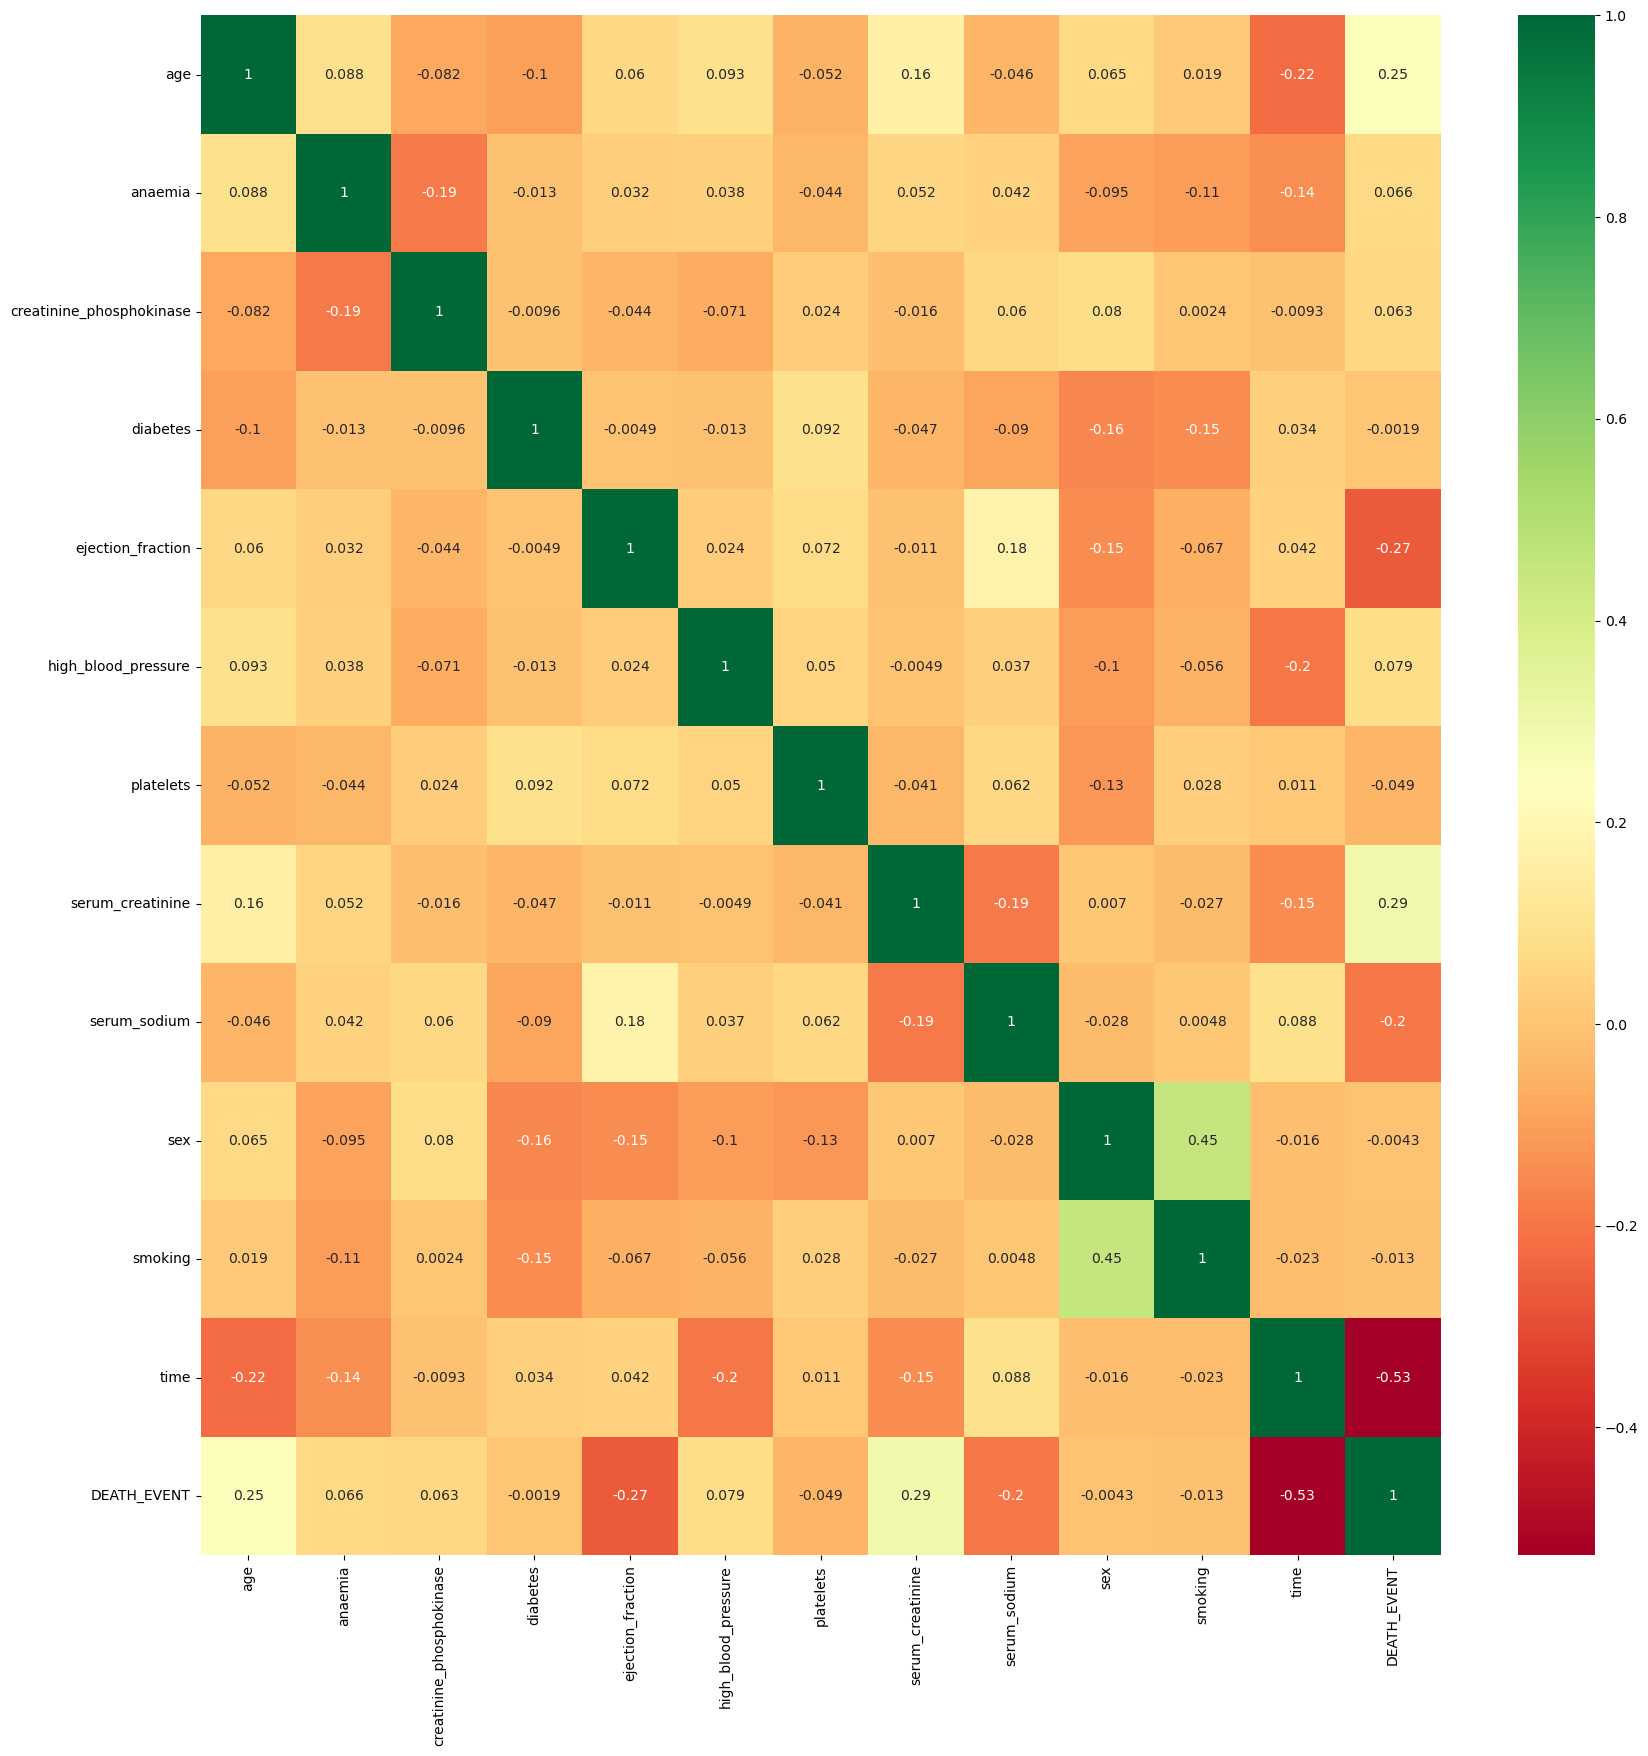

In [17]:
correlation_matrix_m = data.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(correlation_matrix_m, cmap= 'RdYlGn', annot =True)
plt.show()

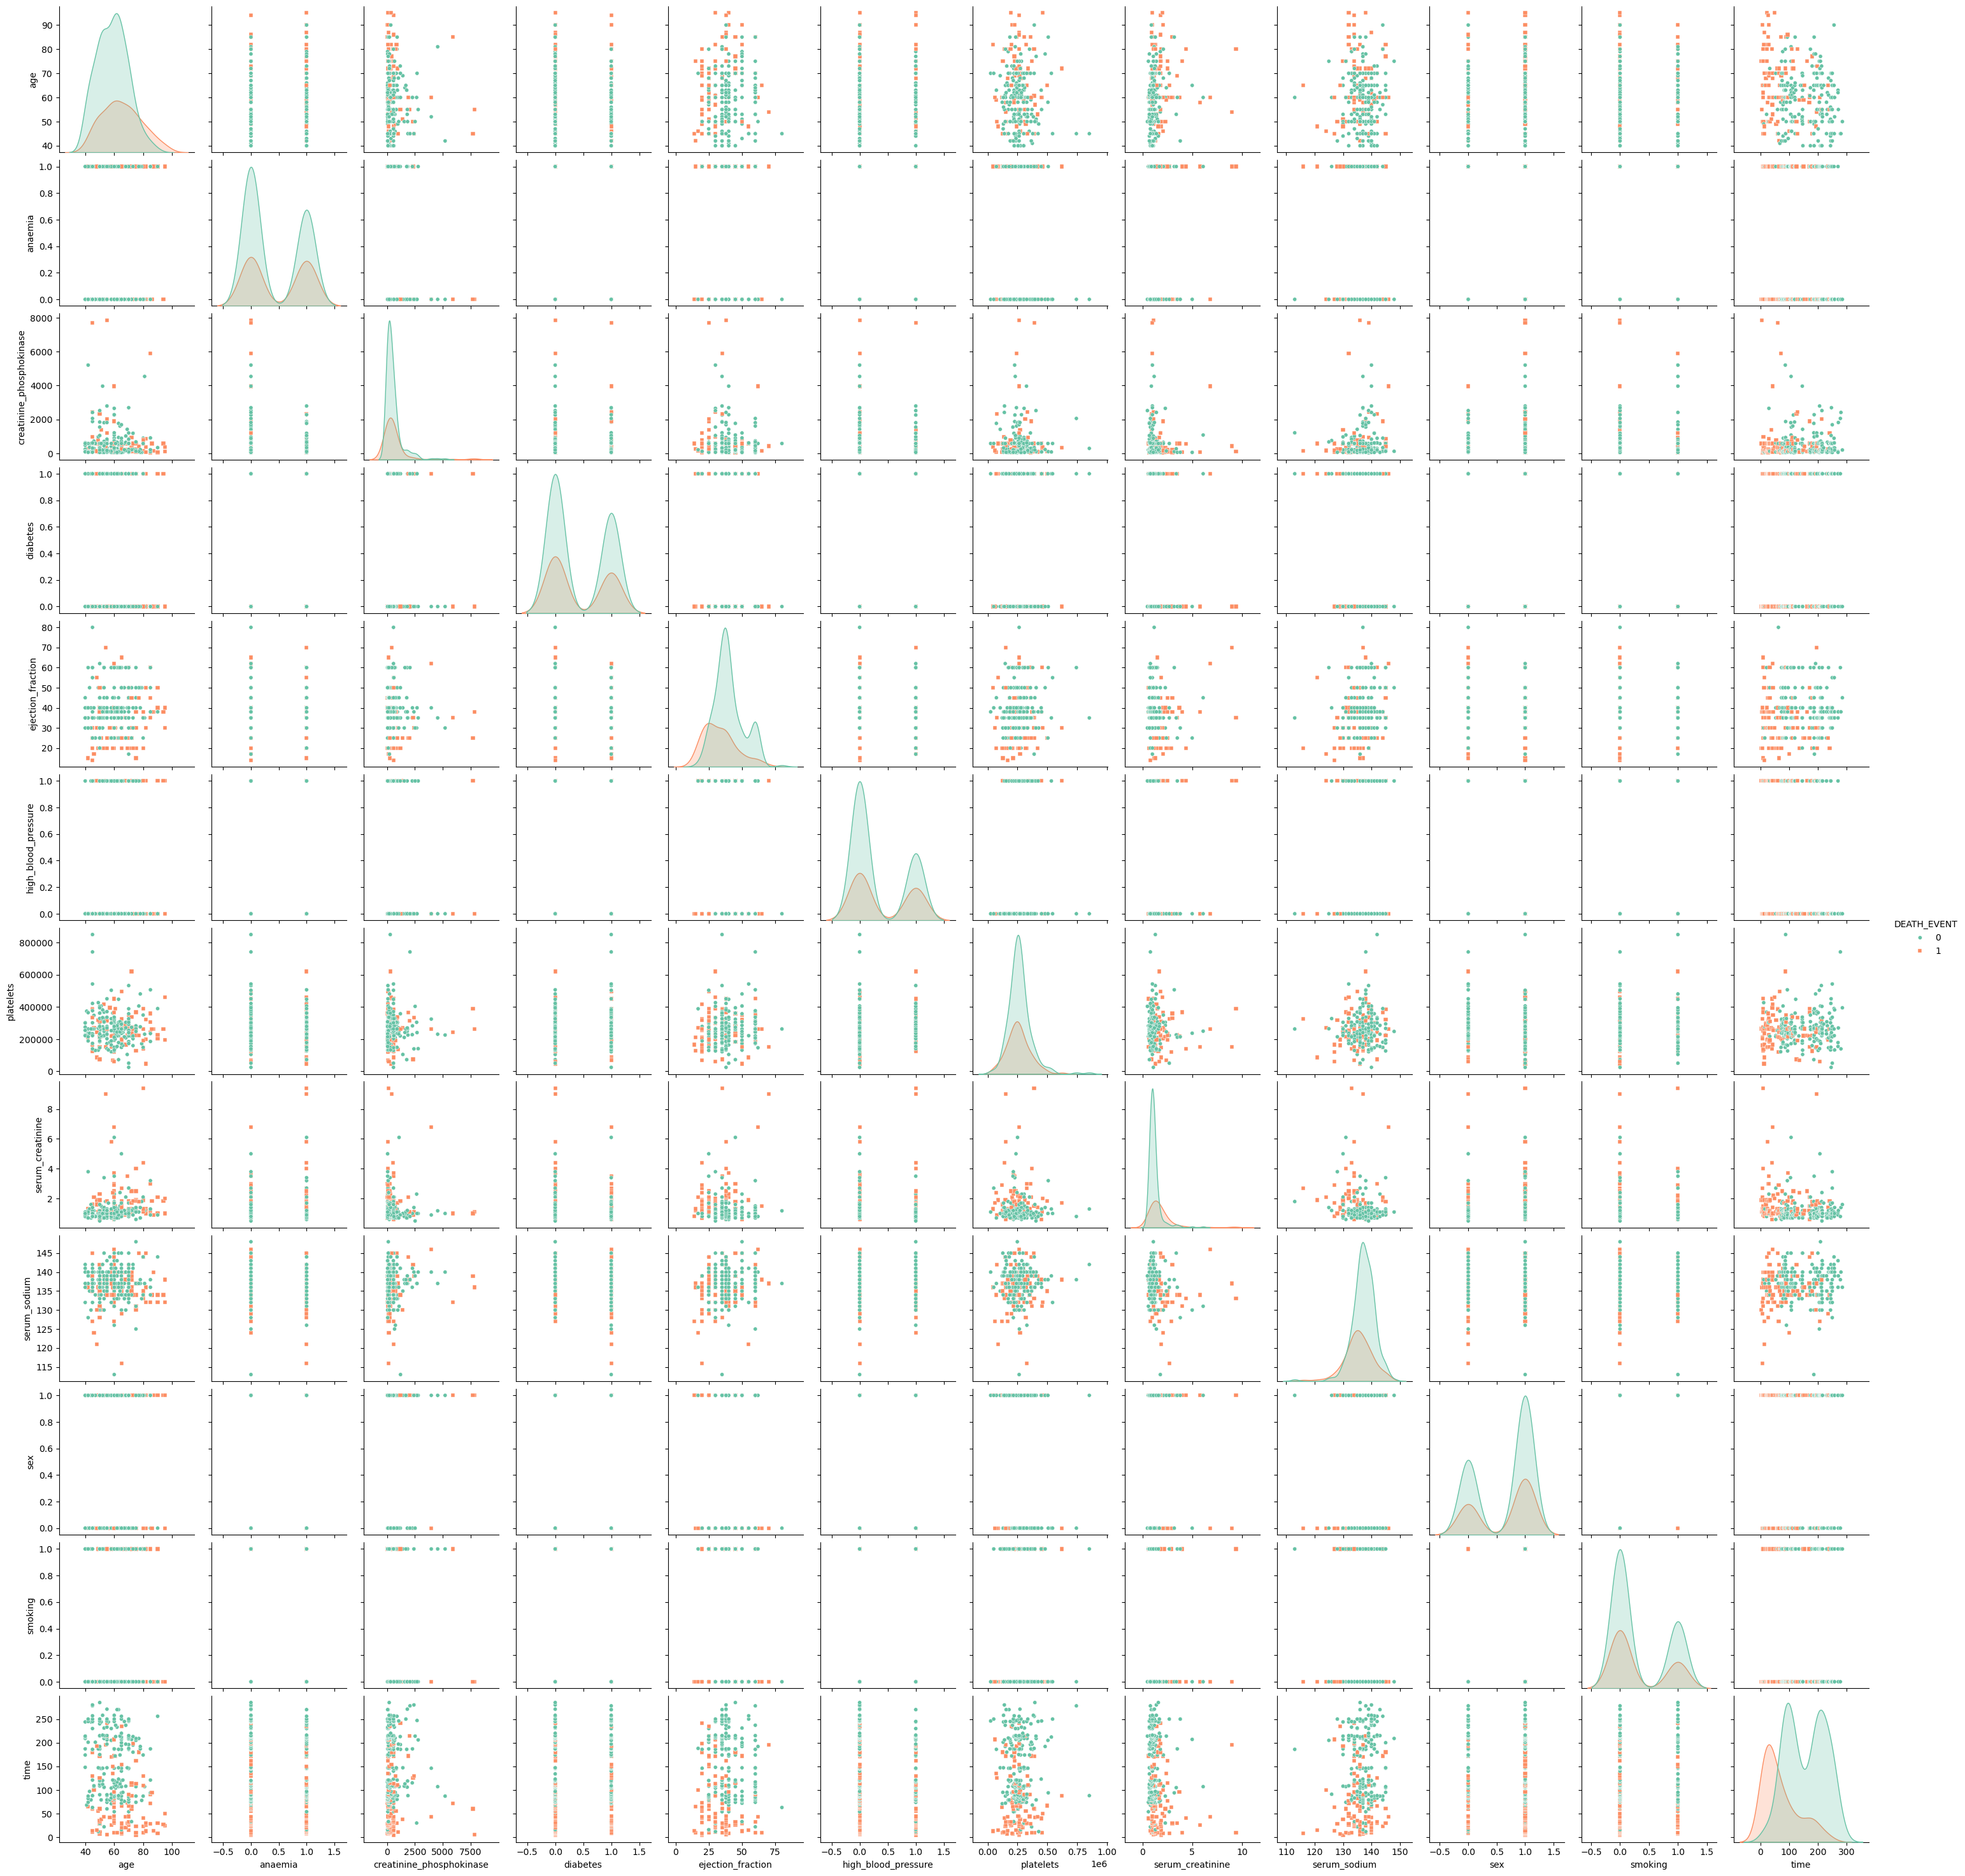

In [18]:
sns.pairplot(data, hue='DEATH_EVENT', markers=["o", "s"],  plot_kws={"s": 20}, palette="Set2")

In [19]:
def histograma_MvsV(df, x, n1, n2):
    sobrevivientes = df[df['DEATH_EVENT'] == 0]
    defunciones = df[df['DEATH_EVENT'] == 1]

    sns.kdeplot(sobrevivientes[x], fill=True, alpha=0.5, ax=axs[n1, n2], label="Sobrevivientes")
    sns.kdeplot(defunciones[x], fill=True, alpha=0.5, ax=axs[n1, n2], label="Defunciones")

    axs[n1, n2].legend(bbox_to_anchor=(1, 0.1), loc="center left", title="Estado")
    axs[n1, n2].set_title(f'Distribución de {x}')

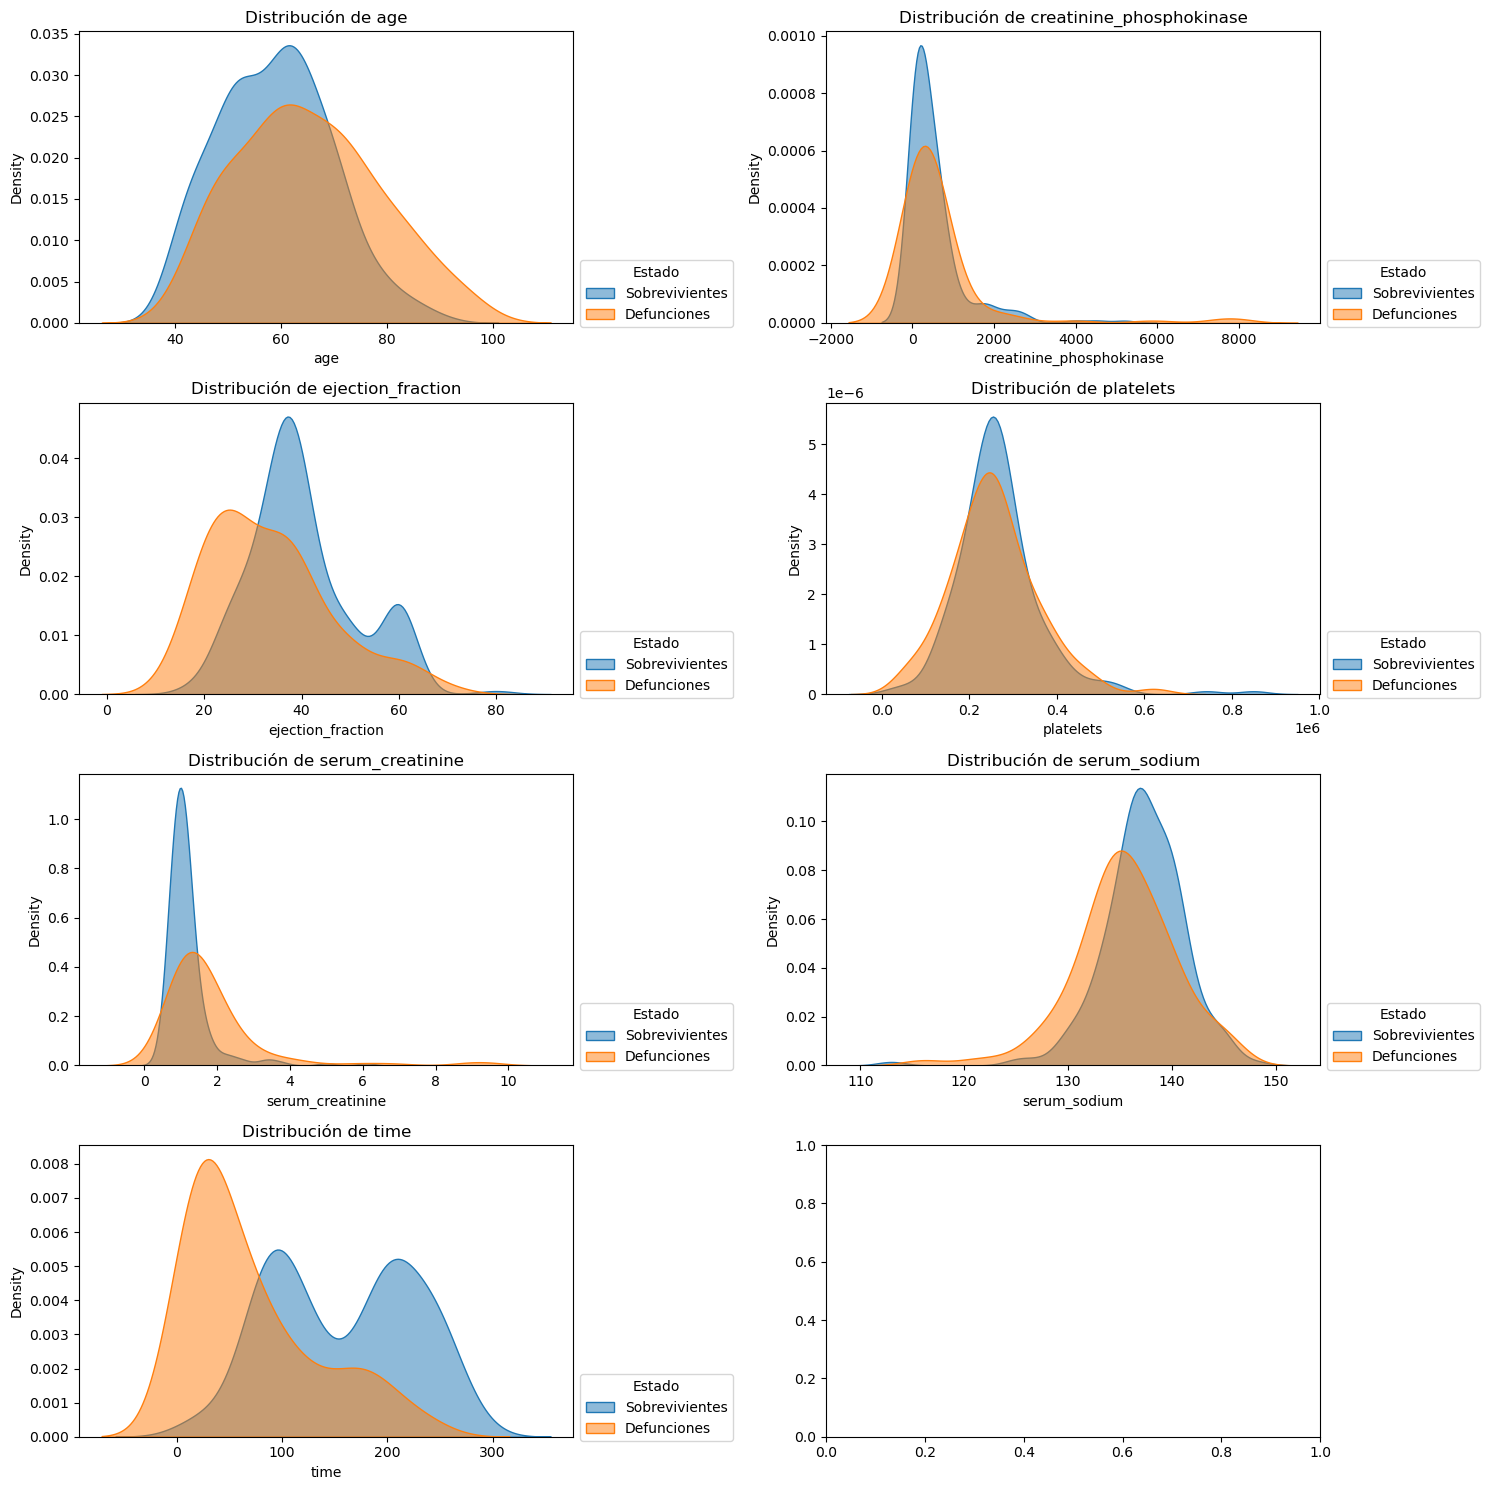

In [20]:
figure, axs = plt.subplots( 4,2, sharey=False, sharex=False, figsize=(15, 15))
histograma_MvsV(data, 'age',0,0)
histograma_MvsV(data, 'creatinine_phosphokinase',0,1)
histograma_MvsV(data, 'ejection_fraction',1,0)
histograma_MvsV(data, 'platelets',1,1)
histograma_MvsV(data, 'serum_creatinine',2,0)
histograma_MvsV(data, 'serum_sodium',2,1)
histograma_MvsV(data, 'time',3,0)
plt.tight_layout()
plt.show()

In [21]:
data.nunique()

age                          47
anaemia                       2
creatinine_phosphokinase    208
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   176
serum_creatinine             40
serum_sodium                 27
sex                           2
smoking                       2
time                        148
DEATH_EVENT                   2
dtype: int64

In [22]:
def caja(df,x,n1,n2):
    sns.boxplot(x=df['DEATH_EVENT'], y=df[x], ax=axs[n1,n2])
    axs[n1,n2].set_title(f'Supervivencia vs {x}')


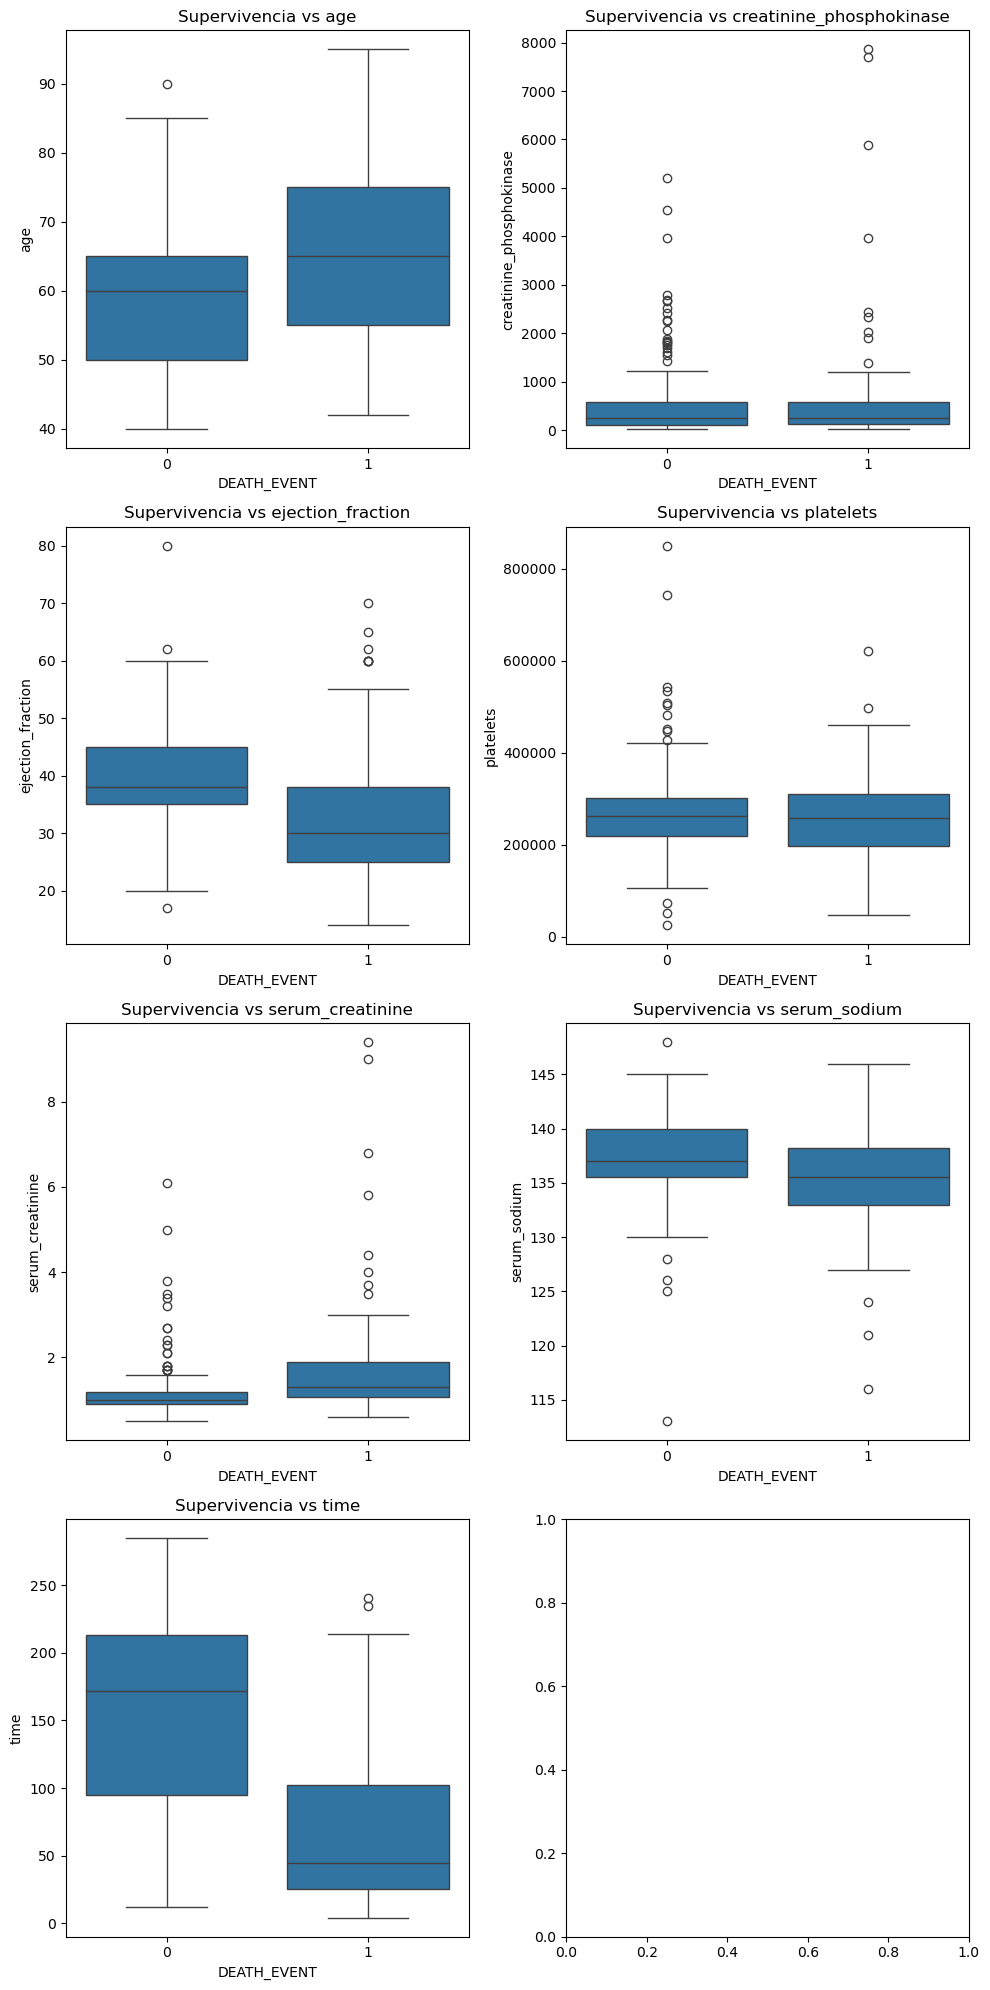

In [23]:
figure, axs = plt.subplots( 4,2, sharey=False, sharex=False, figsize=(10, 20))
caja(data, 'age', 0,0,)
caja(data, 'creatinine_phosphokinase', 0,1)
caja(data, 'ejection_fraction', 1,0)
caja(data, 'platelets', 1,1)
caja(data, 'serum_creatinine', 2,0)
caja(data, 'serum_sodium', 2,1)
caja(data, 'time', 3,0)
plt.tight_layout()
plt.show()

## Análisis de supervivencia entre grupos

In [106]:
from lifelines import KaplanMeierFitter

In [116]:
print(data['creatinine_phosphokinase'].min(), data['creatinine_phosphokinase'].max())

23 7861


In [ ]:
def qcut_labels(df, col):
    
    # Obtener bordes de los cuartiles
    _, bins = pd.qcut(df[col], q=4, retbins=True, duplicates='drop')

    # Crear etiquetas dinámicas
    labels = [f"{int(b)}-{int(c-1)}" for b, c in zip(bins[:-1], bins[1:])]

    # Crear nueva columna con etiquetas
    df[col] = pd.qcut(df[col], q=4, labels=labels, duplicates='drop')
    
    return df

In [141]:
data_categorico = data.copy()
data_categorico.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [111]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [142]:

data_categorico['age'] = pd.cut(data_categorico["age"], 
                           bins = [40, 51, 62, 73, 84, 95],  # 6 bordes → 5 intervalos
                            labels = ["40-50", "51-61", "62-72", "73-83", "84-95"])


qcut_labels(data_categorico, 'creatinine_phosphokinase')

qcut_labels(data_categorico, 'ejection_fraction')

qcut_labels(data_categorico, 'platelets')

data_categorico['serum_creatinine'] = pd.cut(data_categorico["serum_creatinine"], 
                           bins = [0.5, 0.9, 1.1, 1.4, 9.4],  # 6 bordes → 5 intervalos
                            labels = ["0.5-0.9", "0.91-1.1", "1.11-1.4", "1.41-9.4"])

qcut_labels(data_categorico, 'serum_sodium')
data_categorico.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,73-83,0,250-581,0,14-29,1,262000-303499,1.41-9.4,113-133,1,0,4,1
1,51-61,0,582-7860,0,30-37,0,262000-303499,0.91-1.1,134-136,1,0,6,1
2,62-72,0,116-249,0,14-29,0,25100-212499,1.11-1.4,113-133,1,1,7,1
3,40-50,1,23-115,0,14-29,0,25100-212499,1.41-9.4,134-136,1,0,7,1
4,62-72,1,116-249,1,14-29,0,303500-849999,1.41-9.4,113-133,0,0,8,1


In [148]:
data_categorico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   age                       292 non-null    category
 1   anaemia                   299 non-null    int64   
 2   creatinine_phosphokinase  299 non-null    category
 3   diabetes                  299 non-null    int64   
 4   ejection_fraction         299 non-null    category
 5   high_blood_pressure       299 non-null    int64   
 6   platelets                 299 non-null    category
 7   serum_creatinine          298 non-null    category
 8   serum_sodium              299 non-null    category
 9   sex                       299 non-null    int64   
 10  smoking                   299 non-null    int64   
 11  time                      299 non-null    int64   
 12  DEATH_EVENT               299 non-null    int64   
dtypes: category(6), int64(7)
memory usage: 19.4 KB


In [146]:
T = data_categorico['time']   # tiempo de supervivencia
E = data_categorico['DEATH_EVENT']     
kmf = KaplanMeierFitter()
kmf.fit(T, event_observed=E)

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 299 total observations, 203 right-censored observations>

In [149]:
# Funcion comparativa de supervivencia en grupos
def curva_supervivencia(x, ax=None):
    kmf = KaplanMeierFitter()
    T = data_categorico['time'].astype(float)
    E = data_categorico['DEATH_EVENT'].astype(int)

    grades = data_categorico[x].dropna().unique()  # todas las categorías válidas
    for g in grades:
        mask = data_categorico[x] == g
        if mask.sum() == 0:   # evitar series vacías
            continue
        kmf.fit(T[mask], event_observed=E[mask], label=f'{x} {g}')
        kmf.plot_survival_function(ax=ax)

    ax.set_title(f'Supervivencia a insuficiencia cardíaca según {x}')

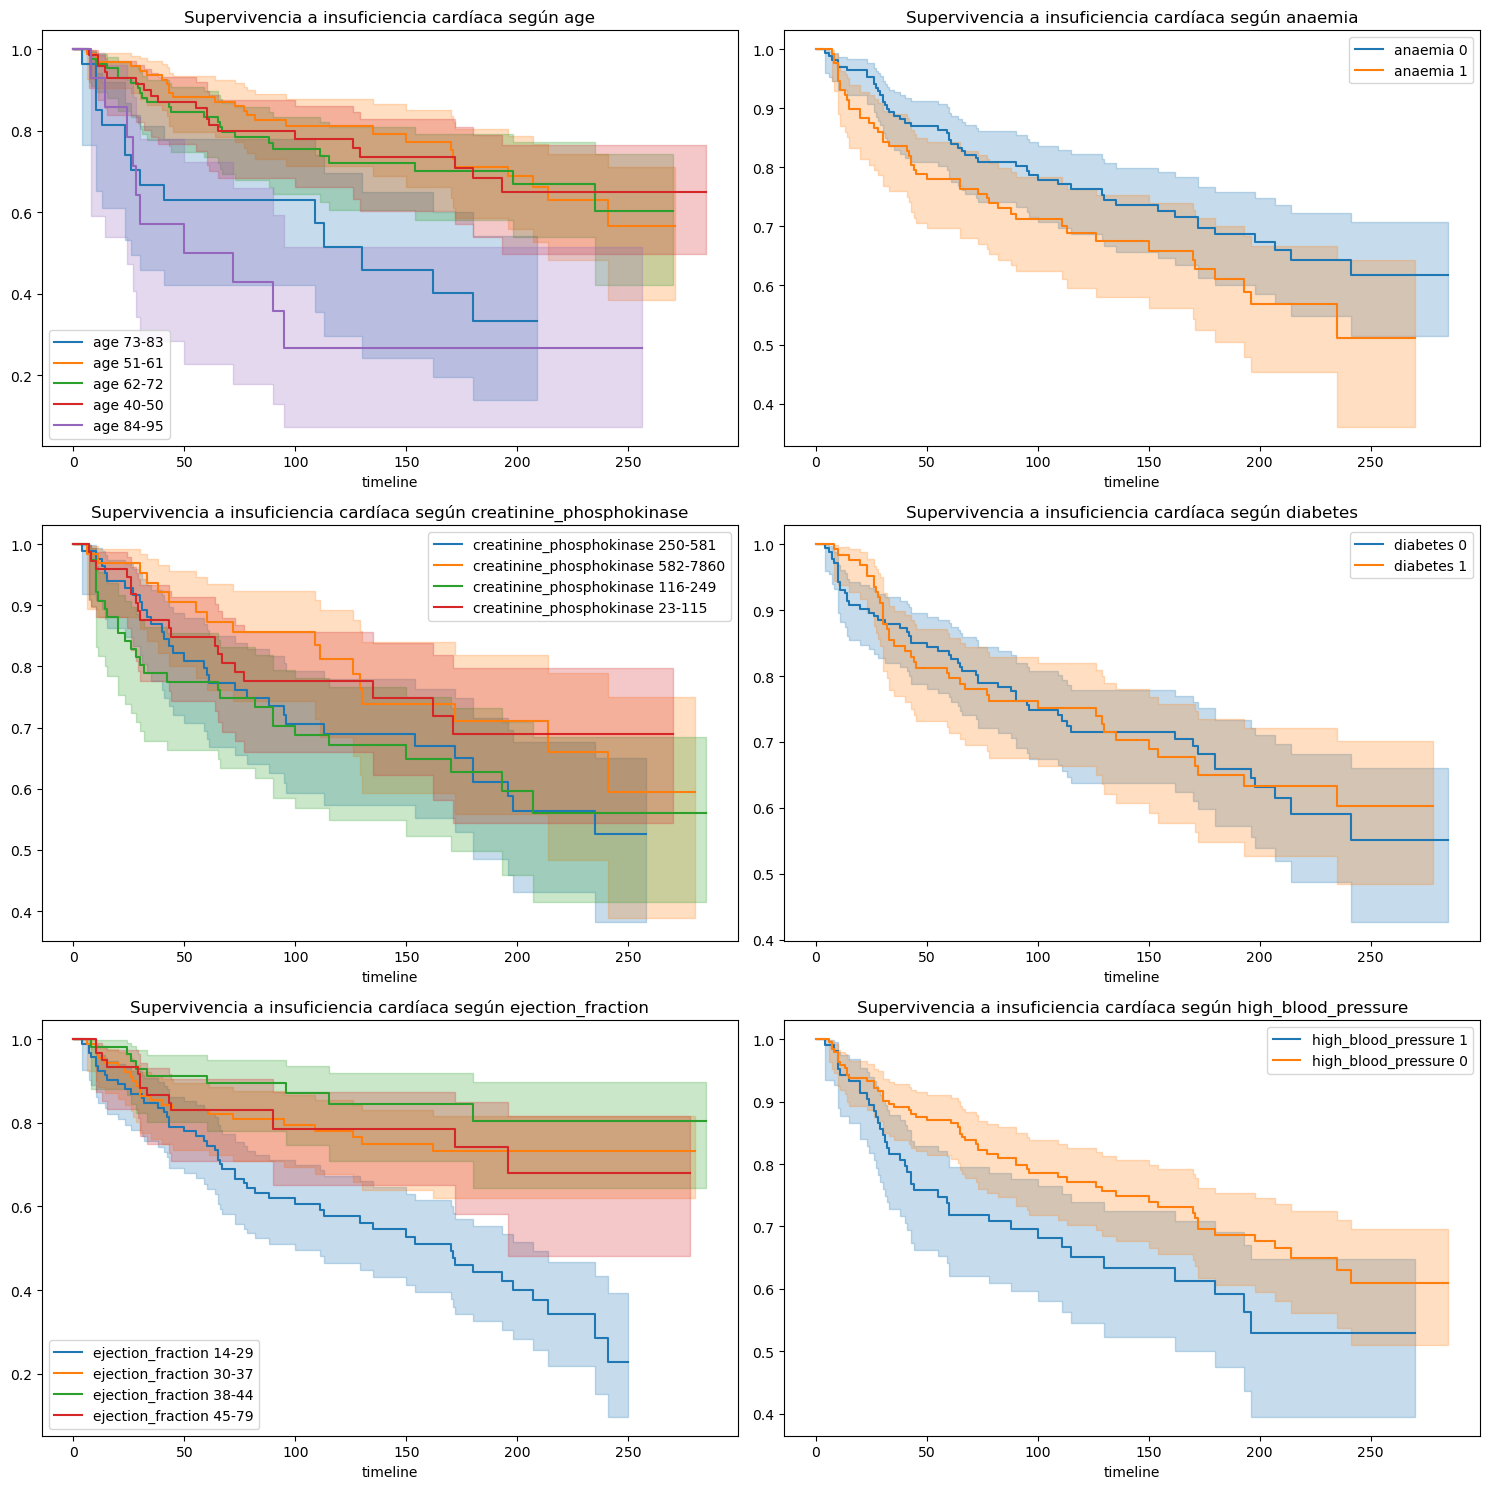

In [150]:
fig, axs = plt.subplots(3, 2, figsize=(15,15))
curva_supervivencia('age', ax=axs[0,0])
curva_supervivencia('anaemia', ax=axs[0,1])
curva_supervivencia('creatinine_phosphokinase', ax=axs[1,0])
curva_supervivencia('diabetes', ax=axs[1,1])
curva_supervivencia('ejection_fraction', ax=axs[2,0])
curva_supervivencia('high_blood_pressure', ax=axs[2,1])
plt.tight_layout()
plt.show()

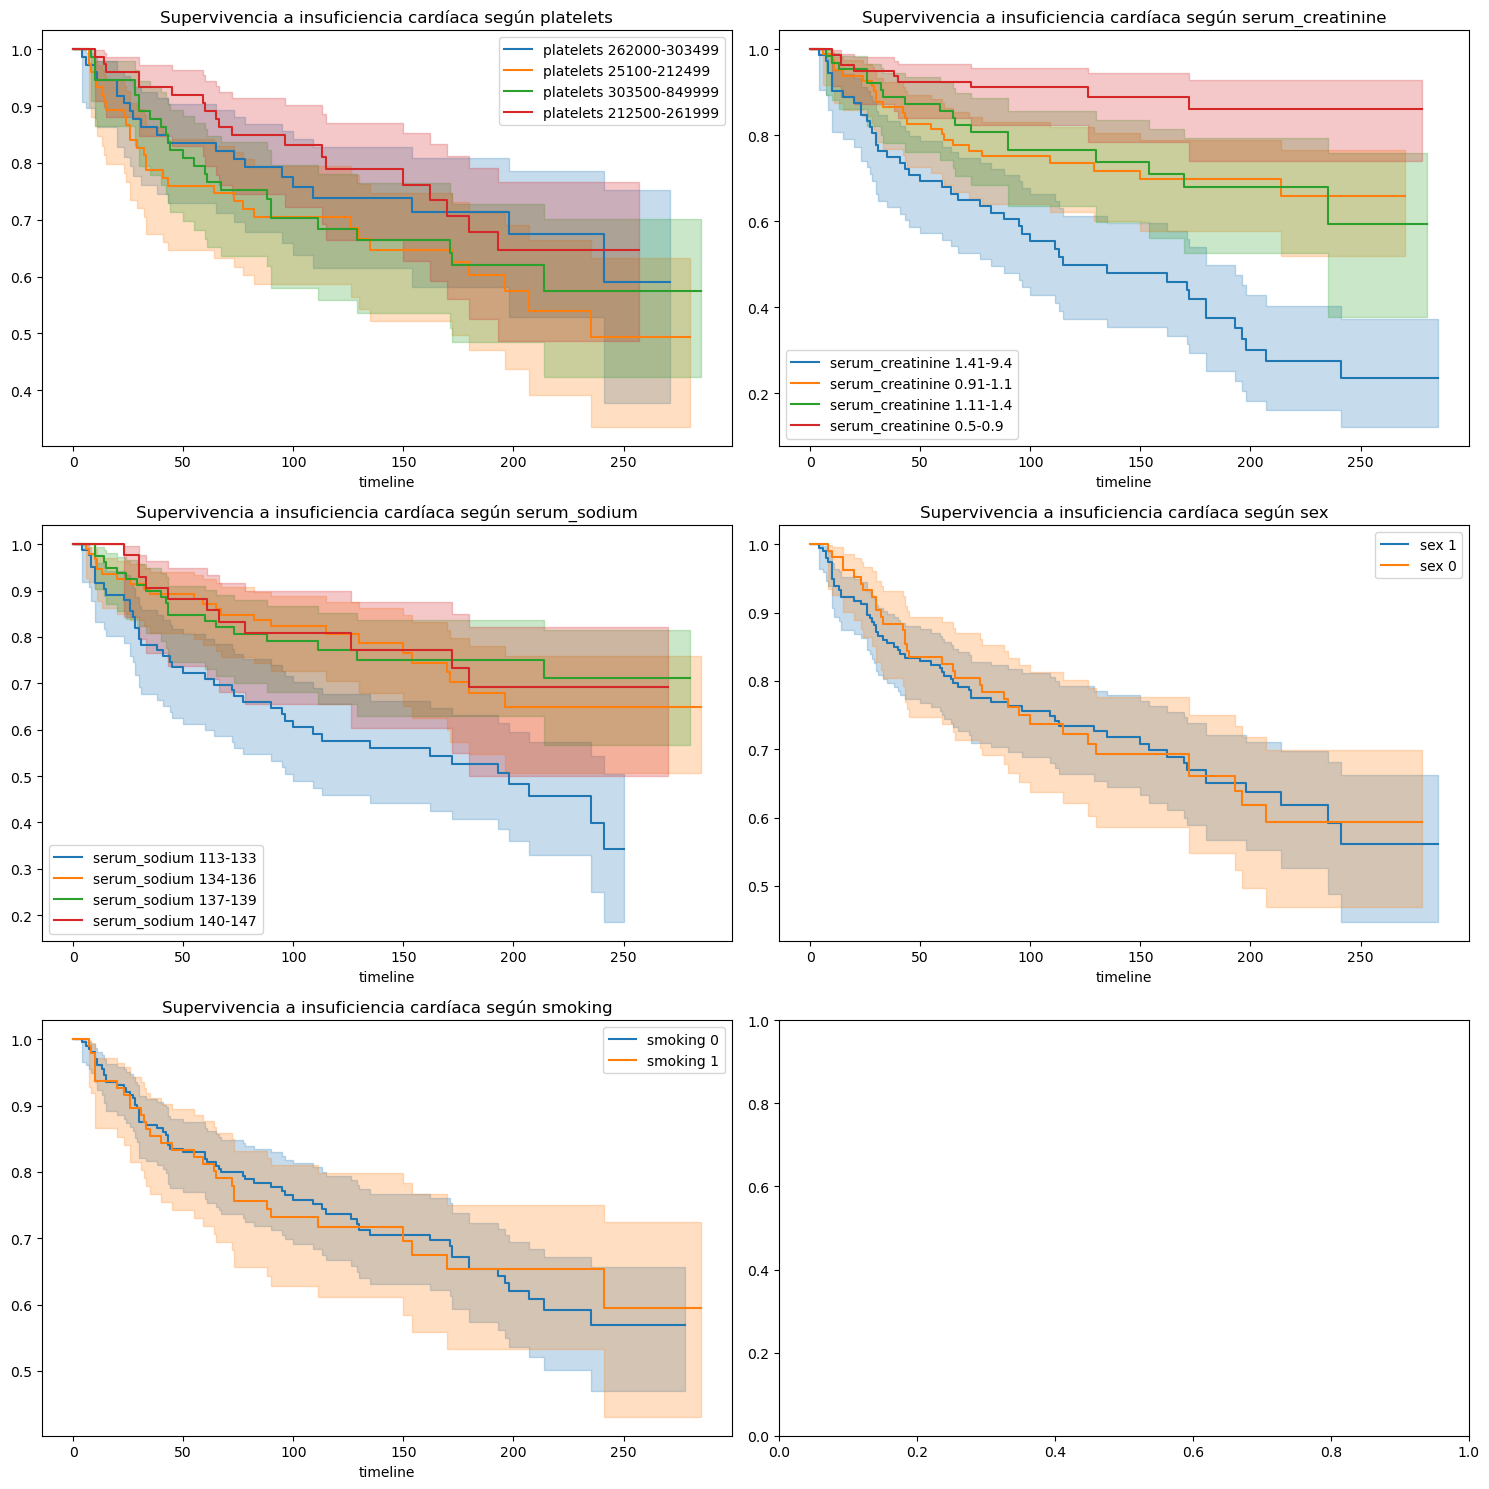

In [151]:
fig, axs = plt.subplots(3, 2, figsize=(15,15))
curva_supervivencia('platelets', ax=axs[0,0])
curva_supervivencia('serum_creatinine', ax=axs[0,1])
curva_supervivencia('serum_sodium', ax=axs[1,0])
curva_supervivencia('sex', ax=axs[1,1])
curva_supervivencia('smoking', ax=axs[2,0])
plt.tight_layout()
plt.show()

In [25]:
data.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

# Construcción de modelos

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [26]:
objetivo = data['DEATH_EVENT']
Predictores = data[['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time']]
# Set de entramiento y prueba
x_train, x_test, y_train, y_test = train_test_split(
    Predictores, objetivo, test_size=0.3, random_state=10)

In [27]:
model = LogisticRegression()
scaler = StandardScaler()

In [28]:
model.fit(x_train, y_train)
pred = model.predict(x_test) 
pd.crosstab(y_test, pred, rownames=["Actual"], colnames=['Predictions'])

c:\Users\HP\anaconda3\envs\ciencia_datos\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Predictions,0,1
Actual,,
0,53,8
1,10,19


In [29]:
# Entrenar
x_train_st = scaler.fit_transform(x_train)
x_test_st = scaler.transform(x_test)

model.fit(x_train_st, y_train)
pred = model.predict(x_test_st) 

In [30]:
pd.crosstab(y_test, pred, rownames=["Actual"], colnames=['Predictions'])

Predictions,0,1
Actual,,
0,49,12
1,8,21


## Selección de categorias

In [33]:
from sklearn.feature_selection import SelectKBest, f_regression

best_features = SelectKBest(f_regression, k=5).fit(Predictores, objetivo)
X_selected = best_features.transform(Predictores)

In [36]:
# Obtener scores de todas las características
feature_scores = pd.DataFrame({
    'Feature': Predictores.columns,
    'Score': best_features.scores_
})
# Ordenar de mayor a menor
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

print(feature_scores)

                     Feature       Score
11                      time  114.181264
7           serum_creatinine   28.158492
4          ejection_fraction   23.094063
0                        age   20.435946
8               serum_sodium   11.765331
5        high_blood_pressure    1.881937
1                    anaemia    1.310096
2   creatinine_phosphokinase    1.173259
6                  platelets    0.718880
10                   smoking    0.047333
9                        sex    0.005534
3                   diabetes    0.001121


In [39]:
feature_scores['Feature'].unique()

array(['time', 'serum_creatinine', 'ejection_fraction', 'age',
       'serum_sodium', 'high_blood_pressure', 'anaemia',
       'creatinine_phosphokinase', 'platelets', 'smoking', 'sex',
       'diabetes'], dtype=object)

## Modelo con selección de caracteristicas

In [82]:
objetivo = data['DEATH_EVENT']
Predictores = data[['time', 'serum_creatinine', 'ejection_fraction', 'age',
       'serum_sodium', 'high_blood_pressure', 'anaemia',
       'creatinine_phosphokinase', 'platelets']]
# Set de entramiento y prueba
x_train, x_test, y_train, y_test = train_test_split(
    Predictores, objetivo, test_size=0.3, random_state=10)
model = LogisticRegression()
scaler = StandardScaler()
model.fit(x_train, y_train)
pred = model.predict(x_test) 
pd.crosstab(y_test, pred, rownames=["Actual"], colnames=['Predictions'])

c:\Users\HP\anaconda3\envs\ciencia_datos\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Predictions,0,1
Actual,,
0,53,8
1,10,19


In [45]:
# Entrenar
x_train_st = scaler.fit_transform(x_train)
x_test_st = scaler.transform(x_test)

model.fit(x_train_st, y_train)
pred = model.predict(x_test_st) 
pd.crosstab(y_test, pred, rownames=["Actual"], colnames=['Predictions'])

Predictions,0,1
Actual,,
0,51,10
1,8,21


### Bosques aleatorios

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
objetivo = data['DEATH_EVENT']
Predictores_c = data[['time', 'serum_creatinine', 'ejection_fraction', 'age',
       'serum_sodium', 'high_blood_pressure', 'anaemia',
       'creatinine_phosphokinase', 'platelets', 'smoking', 'sex',
       'diabetes']]
# Set de entramiento y prueba
x_train_c, x_test_c, y_train_c, y_test_c = train_test_split(
    Predictores_c, objetivo, test_size=0.3, random_state=10)

In [99]:
forest_c = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators=5000)
forest_c.fit(x_train_c,y_train_c)
forest_c.oob_score_

0.8277511961722488

In [101]:
predictions_c = forest_c.predict(x_test_c)
pd.crosstab(y_test_c, predictions_c, rownames=["Actual"], colnames=['Predictions'])

Predictions,0,1
Actual,,
0,53,8
1,8,21


### Bosques aleatorios - selección de caracteristicas

In [ ]:
Predictores = data[['time','serum_creatinine', 'ejection_fraction', 'age']]
# Set de entramiento y prueba
x_train, x_test, y_train, y_test = train_test_split(
    Predictores, objetivo, test_size=0.3, random_state=10)

In [102]:
Predictores = data[['time','serum_creatinine', 'ejection_fraction', 'age']]
x_train, x_test, y_train, y_test = train_test_split(Predictores, objetivo, test_size=0.3, random_state=10)

forest = RandomForestClassifier(n_jobs=2, oob_score=True, n_estimators=5000)
forest.fit(x_train,y_train)
forest.oob_score_

0.8086124401913876

In [103]:
forest.oob_score_

0.8086124401913876

In [104]:
predictions = forest.predict(x_test)
pd.crosstab(y_test, predictions, rownames=["Actual"], colnames=['Predictions'])

Predictions,0,1
Actual,,
0,54,7
1,7,22


In [ ]:
objetivo = data['DEATH_EVENT']
Predictores = data[['time','serum_creatinine', 'ejection_fraction', 'age']]
# Set de entramiento y prueba
x_train, x_test, y_train, y_test = train_test_split(
    Predictores, objetivo, test_size=0.3, random_state=10)

In [105]:
# Modelo de regresión logistica con selección de caracteristicas
x_train_st = scaler.fit_transform(x_train)
x_test_st = scaler.transform(x_test)

model.fit(x_train_st, y_train)
pred = model.predict(x_test_st) 
pd.crosstab(y_test, pred, rownames=["Actual"], colnames=['Predictions'])

Predictions,0,1
Actual,,
0,52,9
1,9,20
